### ☆ Adapting Quantities Algorithm Design And Test ☆

In [85]:
import pandas as pd
import seaborn as sns
from rich import print as pprint
import matplotlib.pyplot as plt

1) Importing necessary library, we use **Shift + Enter** to run a cell

In [63]:
df_new_nutri_db = pd.read_csv('new_nutri_db.csv')
df_Ingredients_db_quantities = pd.read_csv('Ingredients_db_quantities.csv')
pd.set_option('display.max_columns', None) # Satting to views all column defualt are less that our total column

2) Loading "new_nutri_db.csv" and "Ingredients_db_quantities.csv" using pandas as pandas dataframe which is nothing but a programmatically accessible Excel sheet with row and column, ***"new_nutri_db.csv"*** contains nutritional information and other information about different ingredients like water, calories, calcium, carbs, cholesterol, iron, fiber, monounsaturated_fats, and so on, **#Note: it is in per 100g**. ***"Ingredients_db_quantities.csv"*** contains conversion information like **ml** to **grams** of a certain ingredient, as well as other conversion information. in our program we assign new_nutri_db.csv to **df_new_nutri_db** and Ingredients_db_quantities.csv to **df_Ingredients_db_quantities**  

In [59]:
#df_new_nutri_db 

In [60]:
#df_Ingredients_db_quantities

In [104]:
#df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == 'tofu')]

3) Uncomment and  press **shift + Enter** to see the dataframe

In [64]:
given_data=pd.DataFrame({
"item_name":  ['sunflower oil', 'onion', 'chicken', 'tomato', 'tomato paste', 'pasta', 'mozzarella cheese'],
"weight":  ['1.43', '14.74', '38.22', '84.78', '21.15', '32.3', '34.42'],
"unit":  ['ml', 'g', 'g', 'g', 'ml', 'g', 'g'],
})
recipeRemovables=  ['mozzarella cheese']
recipeAddables=  ['chicken stock']
given_data['weight'] = pd.to_numeric(given_data['weight']) # converting weight to make sure that weight are in numeric datatype
given_data # print

,item_name,weight,unit
0,sunflower oil,1.43,ml
1,onion,14.74,g
2,chicken,38.22,g
3,tomato,84.78,g
4,tomato paste,21.15,ml
5,pasta,32.30,g
6,mozzarella cheese,34.42,g


4) Experimental data, this is the structure of the data we receive from frontend to our backend, We must guess an approximated weight of **"recipeAddables"** in this case this is ***"chicken stock"*** and this is our primary goal.

In [66]:
def convert_to_grams(row):
    if row["unit"] == "g":
        return row["weight"]
    elif row["unit"] == "ml":
        # seach on ingredients_db_quantities
        found_df_Ingredients_db_quantities = df_Ingredients_db_quantities.loc[
            (df_Ingredients_db_quantities["item_name"] == row["item_name"])
            & (df_Ingredients_db_quantities["Units"] == "ml")
        ]
        found_df_Ingredients_db_quantities["Grams"].iloc[0]
        return round(row["weight"] * found_df_Ingredients_db_quantities["Grams"].iloc[0], 4)
    else:
        return None

5) Convert the weight of an ingredient to grams based on its unit.

    Parameters:
    row (pd.Series): A pandas Series representing a row in a DataFrame, containing at least the columns 'unit', 'weight', and 'item_name'.
    
    Returns:
    float: The weight in grams if the unit is 'g' or 'ml', otherwise None.
    
    Description:
    - If the unit is 'g', it returns the weight as is.
    - If the unit is 'ml', it looks up the conversion factor from milliliters to grams in the 'df_Ingredients_db_quantities' DataFrame and converts the weight accordingly.
    - If the unit is neither 'g' nor 'ml', it returns None.

In [67]:
def convert_to_calories(row):
    calories=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["calories"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* calories)/ 100, 4)

def convert_to_water(row):
    water=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["water"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* water)/ 100, 4)

def convert_to_fats(row):
    fats=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["fats"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* fats)/ 100, 4)

def convert_to_carbs(row):
    carbs=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["carbs"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* carbs)/ 100, 4)

def convert_to_sodium(row):
    sodium=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["sodium"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* sodium)/ 100, 4)

def convert_to_sugar(row):
    sugar=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["sugar"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* sugar)/ 100, 4)

def convert_to_proteins(row):
    proteins=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["proteins"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* proteins)/ 100, 4)

def convert_to_monounsaturated_fats(row):
    monounsaturated_fats=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["monounsaturated_fats"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* monounsaturated_fats)/ 100, 4)

def convert_to_polyunsaturated_fats(row):
    polyunsaturated_fats=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["polyunsaturated_fats"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* polyunsaturated_fats)/ 100, 4)

def convert_to_saturated_fats(row):
    saturated_fats=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["saturated_fats"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* saturated_fats)/ 100, 4)

def convert_to_trans_fats(row):
    trans_fats=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["trans_fats"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* trans_fats)/ 100, 4)

def convert_to_iron(row):
    iron=df_new_nutri_db.loc[(df_new_nutri_db['item_name'] == row["item_name"])]["iron"].iloc[0]
    grams=row["weight_grams"]
    return round((grams* iron)/ 100, 4)

6) We are Converting the **weight_grams** of an ingredient to calories by the convert_to_calories function based on nutritional data. First, we search on "df_new_nutri_db" by **"item_name"** and then retrieve targeted nutrients for an ingredient, for example, calories for **item_name** **"sunflower oil"**. Then we calculate how many calories are contained in **1.3299g** of **"sunflower oil"**. Again note that in **"df_new_nutri_db"** all nutrients per 100g.
    
    All other functions are the same as **convert_to_calories**, except the name and targeted nutrient, they are self-explanatory and do the same as convert_to_calories
    
    Parameters:
    row (pd.Series): A pandas Series representing a row in a DataFrame, containing at least the columns **'item_name'** and **'weight_grams'**.
    
    Returns:
    float: The total calories for the given weight of the ingredient.

In [68]:
def sum_of_each_column(given_df):
    data={}
    for column in given_df.columns:
        if pd.api.types.is_numeric_dtype(given_df[column]):
            column_sum =round(given_df[column].sum(), 4)
            data[column]=column_sum
    return data

7) Calculate the sum of each numeric column in a DataFrame. in our case each column is a nutrient

    Parameters:
    given_df (pd.DataFrame): A pandas DataFrame containing the data.

    Returns:
    dict: A dictionary where the keys are column names and the values are the rounded sums of the numeric columns.

In [70]:
given_data["weight_grams"] = given_data.apply(convert_to_grams, axis=1)  

8) Calculating "weight_grams" for every ingredient and store in a column

In [42]:
given_data # Press **shift + Enter** to see the dataframe # print

,item_name,weight,unit,weight_grams
0,sunflower oil,1.43,ml,1.3299
1,onion,14.74,g,14.7400
2,chicken,38.22,g,38.2200
3,tomato,84.78,g,84.7800
4,tomato paste,21.15,ml,23.2650
5,pasta,32.30,g,32.3000
6,mozzarella cheese,34.42,g,34.4200


9) After calculating "weight_grams" for every ingredient, the dataframe looks like this.

In [72]:
given_data["calories"] = given_data.apply(convert_to_calories, axis=1)

10) Calculating "calories" for every ingredient and store in a column name "calories"

In [73]:
given_data["water"] = given_data.apply(convert_to_water, axis=1)

In [74]:
given_data["fats"] = given_data.apply(convert_to_fats, axis=1)

In [75]:
given_data["carbs"] = given_data.apply(convert_to_carbs, axis=1)

In [76]:
given_data["sodium"] = given_data.apply(convert_to_sodium, axis=1)

In [77]:
given_data["sugar"] = given_data.apply(convert_to_sugar, axis=1)

In [78]:
given_data["proteins"] = given_data.apply(convert_to_proteins, axis=1)

In [79]:
given_data["monounsaturated_fats"] = given_data.apply(convert_to_monounsaturated_fats, axis=1)

In [80]:
given_data["saturated_fats"] = given_data.apply(convert_to_saturated_fats, axis=1)

In [81]:
given_data["trans_fats"] = given_data.apply(convert_to_trans_fats, axis=1)

In [82]:
given_data["iron"] = given_data.apply(convert_to_iron, axis=1)

11) All the Above codes do the same as in step 10.   they also self-explanatory

In [88]:
given_data # Press **shift + Enter** to see the dataframe # print

,item_name,weight,unit,weight_grams,calories,water,fats,carbs,sodium,sugar,proteins,monounsaturated_fats,saturated_fats,trans_fats,iron
0,sunflower oil,1.43,ml,1.3299,11.7563,0.0000,1.3299,0.0000,0.0000,0.0000,0.0000,0.6862,0.1340,0.0,0.0000
1,onion,14.74,g,14.7400,6.0434,13.1348,0.0133,1.4335,0.0005,0.6279,0.1489,0.0027,0.0050,0.0,0.0295
2,chicken,38.22,g,38.2200,81.4086,25.2176,5.9088,0.0344,0.0264,0.0000,6.5318,2.4423,1.6855,0.0,0.5236
3,tomato,84.78,g,84.7800,15.2604,80.1341,0.1696,3.3107,0.0042,2.2297,0.7461,0.0348,0.0314,0.0,0.2289
4,tomato paste,21.15,ml,23.2650,19.0773,17.0998,0.1093,4.3994,0.0183,2.6278,1.0050,0.0156,0.0233,0.0,0.6933
5,pasta,32.30,g,32.3000,116.8839,3.1977,0.5287,24.0224,0.0010,0.7160,4.0998,0.0000,0.0447,0.0,1.1026
6,mozzarella cheese,34.42,g,34.4200,83.7735,20.7208,6.2411,0.6115,0.1753,0.2876,6.1909,1.8354,3.6727,0.0,0.1228


12) After calculating, and populating columns with nutrient information, this is what our given recipe ingredients look like

In [94]:
original_nutri=sum_of_each_column(given_data)
pprint(original_nutri)

{
    'weight': 227.04,
    'weight_grams': 229.0549,
    'calories': 334.2034,
    'water': 159.5048,
    'fats': 14.3007,
    'carbs': 33.8119,
    'sodium': 0.2257,
    'sugar': 6.489,
    'proteins': 18.7225,
    'monounsaturated_fats': 5.017,
    'saturated_fats': 5.5966,
    'trans_fats': 0.0,
    'iron': 2.7007
}

13) we are calculating the sum of each numerical column by passing the "given data" dataframe to the sum_of_each_column function which returns a dictionary that contains a key as a column name and a value as the sum of that column. 

In [95]:
original_nutri_df= pd.DataFrame(original_nutri.items(), columns=['Nutrient', 'Amount'])
original_nutri_df = original_nutri_df[original_nutri_df['Nutrient'] != 'weight']
original_nutri_df # print

,Nutrient,Amount
1,weight_grams,229.0549
2,calories,334.2034
3,water,159.5048
4,fats,14.3007
5,carbs,33.8119
6,sodium,0.2257
7,sugar,6.4890
8,proteins,18.7225
9,monounsaturated_fats,5.0170
10,saturated_fats,5.5966


14) Converting Dictionary to a pandas dataframe for further statistical analysis. We excluded weight hence it has nothing to do with future calculation.

In [105]:
after_removed = given_data[~given_data['item_name'].isin(recipeRemovables)] #Removing Some ingredients

15) we're removing an ingredient as the user requested from our original recipe, in this case from "given_data"

In [106]:
after_removed=sum_of_each_column(after_removed)
after_removed_df=pd.DataFrame(after_removed.items(), columns=['Nutrient', 'Amount'])
after_removed_df = after_removed_df[after_removed_df['Nutrient'] != 'weight']
after_removed_df # print

,Nutrient,Amount
1,weight_grams,194.6349
2,calories,250.4299
3,water,138.7840
4,fats,8.0596
5,carbs,33.2004
6,sodium,0.0504
7,sugar,6.2014
8,proteins,12.5316
9,monounsaturated_fats,3.1816
10,saturated_fats,1.9239


16) After removing an ingredient from "given_data" we are recalculating the sum of each numerical column by passing the "given data" dataframe to the sum_of_each_column function which returns a dictionary that contains a key as a column name and a value as the sum of that column. This the same as step 13

In [109]:
comparison_df = pd.merge(original_nutri_df, after_removed_df, on='Nutrient')
comparison_df # print

,Nutrient,Amount_x,Amount_y
0,weight_grams,229.0549,194.6349
1,calories,334.2034,250.4299
2,water,159.5048,138.7840
3,fats,14.3007,8.0596
4,carbs,33.8119,33.2004
5,sodium,0.2257,0.0504
6,sugar,6.4890,6.2014
7,proteins,18.7225,12.5316
8,monounsaturated_fats,5.0170,3.1816
9,saturated_fats,5.5966,1.9239


17) We combine the dataframe of the original recipe's total nutrients with the dataframe after removing one of two ingredients

In [26]:
comparison_df.rename(columns={'Amount_x': 'Amount_original', 'Amount_y': 'Amount_after'}, inplace=True)
comparison_df['Difference'] = comparison_df['Amount_original'] - comparison_df['Amount_after']
comparison_df # print

,Nutrient,Amount_original,Amount_after,Difference
0,grams,229.0549,194.6349,34.4200
1,calories,334.2034,250.4299,83.7735
2,water,159.5048,138.7840,20.7208
3,fats,14.3007,8.0596,6.2411
4,carbs,33.8119,33.2004,0.6115
5,sodium,0.2257,0.0504,0.1753
6,sugar,6.4890,6.2014,0.2876
7,proteins,18.7225,12.5316,6.1909
8,monounsaturated_fats,5.0170,3.1816,1.8354
9,saturated_fats,5.5966,1.9239,3.6727


18) renaming Amount_x to Amount_original and Amount_y to Amount_After. Calculating the Difference of Amount_original and Amount_After

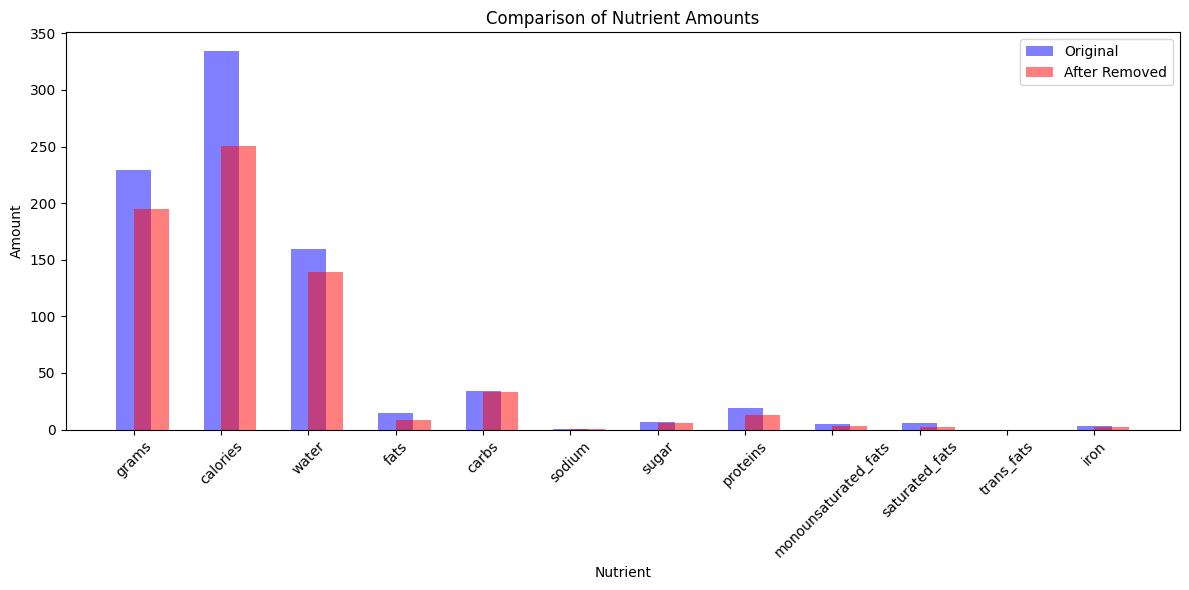

In [31]:
plt.figure(figsize=(12, 6))

# Original nutrient amounts
plt.bar(comparison_df['Nutrient'], comparison_df['Amount_original'], color='b', alpha=0.5, label='Original', width=0.4, align='center')

# After removed nutrient amounts
plt.bar(comparison_df['Nutrient'], comparison_df['Amount_after'], color='r', alpha=0.5, label='After Removed', width=0.4, align='edge')

plt.xlabel('Nutrient')
plt.ylabel('Amount')
plt.title('Comparison of Nutrient Amounts')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

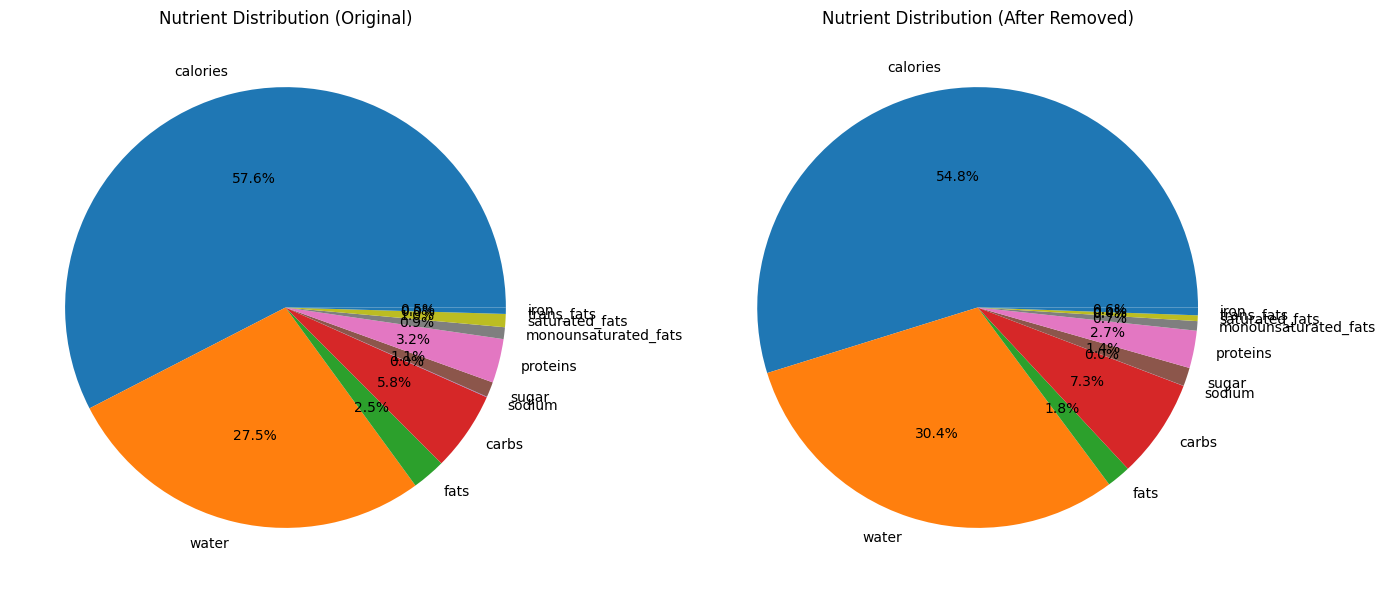

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Original pie chart
axs[0].pie(original_nutri_df['Amount'], labels=original_nutri_df['Nutrient'], autopct='%1.1f%%')
axs[0].set_title('Nutrient Distribution (Original)')

# After removed pie chart
axs[1].pie(after_removed_df['Amount'], labels=after_removed_df['Nutrient'], autopct='%1.1f%%')
axs[1].set_title('Nutrient Distribution (After Removed)')

plt.tight_layout()
plt.show()
